# **Workflow**

## Configuration:

Import necessary entities:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import full, array
from xgboost import XGBRegressor
from warnings import simplefilter
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas import (
    Series,
    DataFrame,
    read_json,
    set_option,
)

Ignore all warnings:

In [2]:
simplefilter(action="ignore", )

Prepare notebook:

In [3]:
set_option("future.no_silent_downcasting", True, )

## Analysis:

* *Supervised Learning*: for each set of features values `X`, there is a answer `y`.
  * *Regression*: for each set of features values `X`, there is a real number answer `y`.
  * *Binary Classification*: for each set of features values `X`, there is a bool answer `y`.
  * *Multiclass Classification*: for each set of features values `X`, there is a categorical answer `y`.

* *Unsupervised Learning*: based on the set of features `X`, patterns in the data are displayed.
  * *Clustering*: sets of feature values `X` are clustered by similarity.
  * *Dimension Reduction*: the dimension of the `X` features is decreasing.
  * *Association*: patterns are identified based on the set of values of the `X` features.

### Write `5` examples of *Machine Learning* methods application in life.

### `What is the benefit of using Machine Learning methods?`

1) Scoring of the client's credit history:
   * Cost.
   * Speed.
   * Scalability.
   * Objectivity.
   * Reproducibility.

2) Dollar price forecast:
   * Speed.
   * Complexity.
   * Objectivity.

3) *Clustering* of buildings by energy consumption:
   * Complexity.
   * Automation.
   * Scalability.
   * Objectivity.

4) *Classification* of cars:
   * Speed.
   * Automation.
   * Scalability.

5) Binary classifying a message as spam or not:
   * Speed.
   * Complexity.
   * Scalability.
   * Objectivity.

### Classify tasks from table and examples to define their class:

* *Supervised Learning*:
  * *Regression*:
    - Predict house price.
    - Dollar price forecast.
    - Scoring of the client's credit history.

  * *Binary Classification*:
    - Predict whether a client returns a loan.
    - Binary classifying a message as spam or not.
    - Recognition of defective products on the production line.

  * *Multiclass Classification*:
    - *Classification* of cars.
    - Choose what medicine out of available a patient should take.

  * *Ranking*:
    - Search sites for input text query.

  * *Time Series*:
    - Predict when a patient needs to take medicine.

* *Unsupervised Learning*:
  * *Clustering*:
    - *Clustering* of buildings by energy consumption.
    - Split customers of a store into segments to understand differences of
      their behavior.

  * *Association*:
    - Choose segment of clients for a promo communication.

  * *Anomaly Detection*:
    - Detect anomaly in site traffic.

* *Reinforcement Learning*:
  - Decide how to place products on a shelf in a store.

### Write the difference between *Multiclass Classification* and *Multilabel Classification*:

The difference between *Multiclass Classification* and *Multilabel Classification* is that for *Multiclass Classification*, we predict ONE of the classes that is most similar for a given dataset, but for *Multilabel Classification*, we predict one or MORE classes suitable.

### `Is an case with housing prices a regression problem?`

Answer: given the data we have and our metric, **yes**, this problem relates to regression.

### `Is it possible to reduce the regression problem to classification?`

Answer: yes. To transform a *Regression* problem into a *Multiclass Classification* problem, divide the range of values of `y` (target) into intverals, each of which will represent a class.
To convert the problem into a *Binary Classification*, set a boundary, to the right of which there will be a positive class, and to the left a negative one, or vice versa.

## *Data Analysis*:

Create a dictionary for `read_csv()` function calling:

In [4]:
read_csv_params: dict[str, str] = {
    "file": "train.json",

    "file_path": "../data/json/",
}

### Load data from [Kaggle.com](https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data) with *Pandas*:

In [5]:
first_df: DataFrame = read_json(
    read_csv_params["file_path"] + read_csv_params["file"],
)

Check `first_df` *Pandas* dataframe:

In [6]:
first_df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


Use a method `.info()` to check `first_df` *Pandas* dataframe size:

In [7]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


### `What is the size of data?`

In [8]:
print(
    f"The count of rows is: {first_df.shape[0]}," +
    f"\nthe count of columns is: {first_df.shape[1]}," +
    "\nthe memory usage is around 6 MB.",
)

The count of rows is: 49352,
the count of columns is: 15,
the memory usage is around 6 MB.


### Print the list of columns:

In [9]:
first_df.columns.to_list()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

### `Which column is a target?`

Answer: the `interest_level` column is a target.

Make an analysis of the data.

Use methods: `.info()`, `.describe()`, `.corr()`:

In [10]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Use method `.describe()`:

In [11]:
first_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


Use method `.corr()`:

In [12]:
first_df.select_dtypes(include=["number", ], ).corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


### Explain the results of outputs:

The method `.info()` shows: the number of rows and columns of the *Pandas* dataframe, data by columns (features) of the *Pandas* dataframe: the column index, it is name, the number of non-zero values, the column data type.
It displays statistics on the *Pandas* dataframe: the amount of *RAM* used, the number of columns of each data type.

The method `.describe()` shows: the statistical characteristics of numeric columns (features).
The statistical characteristics are: `count` - the number of column values, `mean` - the average value of the column, `std` - the average deviation of the values, `min` - the minimum value of the column, `25 %` - the first quartile, `50 %` - the second quartile, `75 %` - the third quartile, `max` - the maximum value of the column.

The method `.corr()` shows a linear correlation between numeric columns (features).
`1` - maximum direct correlation, `-1` - maximum inverse correlation, `0` - no correlation.

### `Are there empty columns?`

Answer: no, there are not.

Create a list `necess_cols` with names of necessary columns:

In [13]:
necess_cols: list[str] = [
    "price",
    "bedrooms",
    "bathrooms",
    "interest_level",
]

### Work with `3` features: `bathrooms`, `bedrooms`, `interest_level` with target column `price`. Make a *Pandas* dataframe with these columns:

In [14]:
df = first_df[necess_cols]

Check `df` *Pandas* dataframe:

In [15]:
df

,price,bedrooms,bathrooms,interest_level
4,2400,1,1.0,medium
6,3800,2,1.0,low
9,3495,2,1.0,medium
10,3000,3,1.5,medium
15,2795,0,1.0,low
...,...,...,...,...
124000,2800,3,1.0,low
124002,2395,2,1.0,medium
124004,1850,1,1.0,medium
124008,4195,2,1.0,medium


## *Statistical Data Analysis*:

### Give a definition of: *mean*, *median*, *mode*, *variance*, *standard deviation*, *outliers*, *percentiles*, *confidential intervals*:

*Mean Value* - a statistical quantity defined as the sum of all the elements of a sample (general population) divided by the number of elements of this sample (general population).

*Median Value* - a statistical value of a sample (general population) that divides an ordered series of a sample (general population) in half.
If the sample size (of the general population) is even, then the average value of the two elements in the middle of the sample (general population) is taken.

*Mode Value* - a statistical value of the sample (general population), which characterizes the most common value of the sample (general population).

*Variance Value* - a statistical value equal to the mean square of the differences between the values of the sample (general population) and the *Mean Value* of the sample (general population).
It shows the difference between the values of the sample (general population) and the *Mean Value* of the sample (general population).

*Standart Deviation Value* - a statistical value equal the mean difference between the module of values of the sample (general population) and the *Mean Value* of the sample (general population).
It shows the difference between the values of the sample (general population) and the *Mean Value* of the sample (general population).

*Outliers* - a values that are very differents in values from the *Mean Value* of the sample (general population).

*Percentiles* - are three values, which divide the sample (general population) into `4` parts equal in number of elements.

*Confidential Intervals* - is the range of values of the sample (general population), which contains, with a certain probability, the desired value of the sample (general population).

### Be free with distributions: *Discrete Uniform*, *Distribution*, *Bernoulli Distribution*, *Binomial Distribution*, *Poisson Distribution*, *Normal Distribution*, *Exponential Distribution*:

*Distribution* - a function that describes possible values of a random variable and the probability of occurrence.

*Normal Distribution* - a continuous, unimodal, symmetrical distribution of a sample feature (general population).

*Discrete Uniform Distribution* - a probability distribution where all possible values have the same probability.

*Bernoulli Distribution* - a discrete probability distribution that models a single experiment with two possible outcomes: success or failure.

*Binomial Distribution* - a discrete probability distribution that models the number of successes in a series of `n` independent *Bernoulli* trials with a constant probability of success `p`.

*Poisson Distribution* - a discrete probability distribution that models the number of events occurring in a fixed interval of time, provided that these events occur at a constant average intensity and independently of each other.

*Exponential Distribution* - a continuous probability distribution that models the time between events in the *Poisson* process.

## Target analysis:

### Plot a distribution histogram of the target `price`:

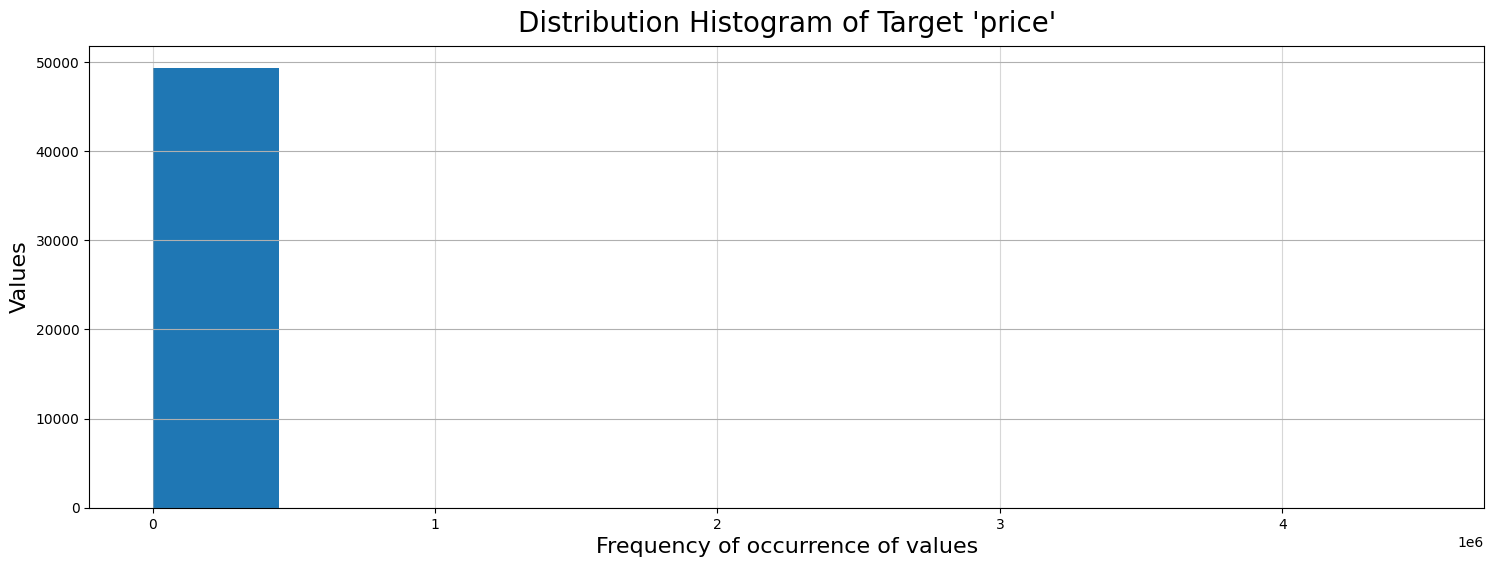

In [16]:
plt.figure(figsize=(18, 6, ), )
df["price"].hist()
plt.grid(axis='x', alpha=0.5, )
plt.ylabel("Values", fontsize=16, )
plt.xlabel("Frequency of occurrence of values", fontsize=16, )
plt.title(
    "Distribution Histogram of Target 'price'",
    pad=10,
    fontsize=20,
)
plt.show();

### `Is it clear?`

Answer: no.

### Plot the boxplot:

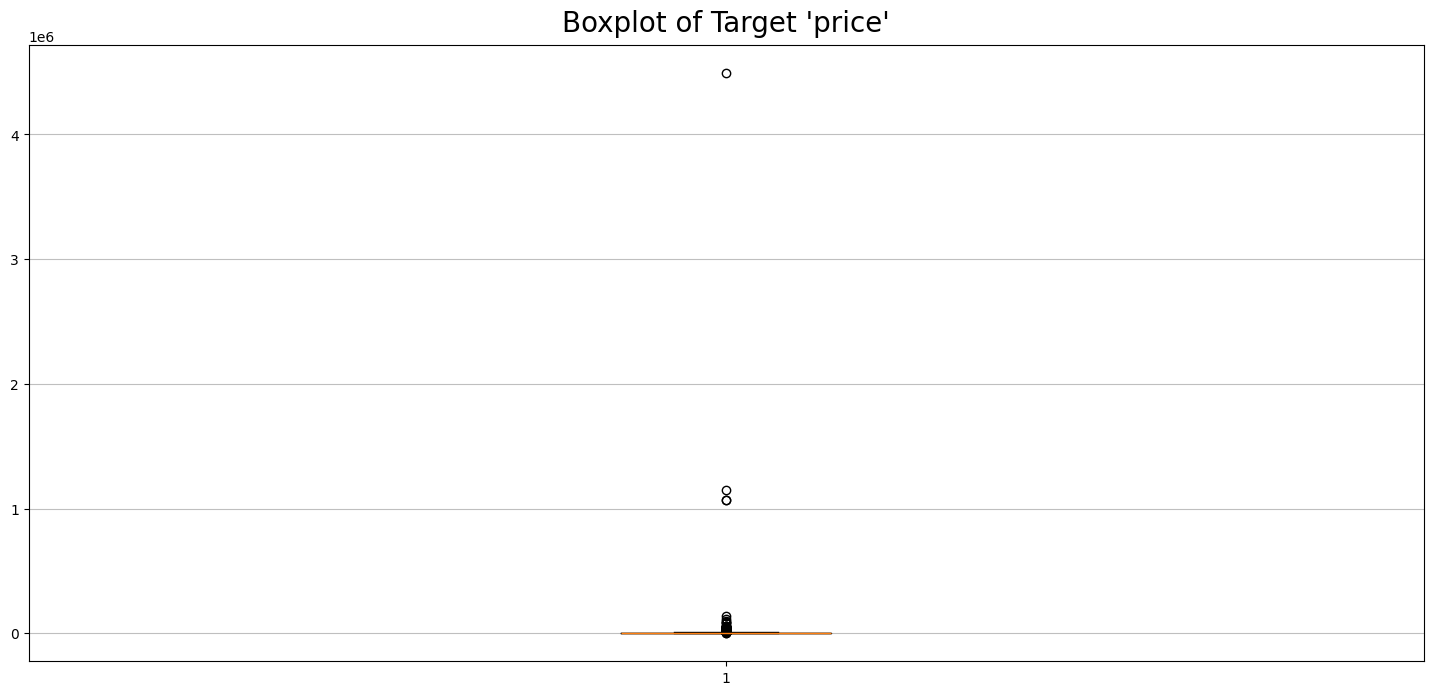

In [17]:
plt.figure(figsize=(18, 8, ), )
plt.boxplot(df["price"], )
plt.grid(axis='y', alpha=0.8, )
plt.title(
    "Boxplot of Target 'price'",
    pad=10,
    fontsize=20,
)
plt.show();

### `What you say about target?`

Answer: there are strong outliers in the values, which do not allow estimating the target variable.

### `Are there outliers?`

Answer: the number of outliers is large.

Create a variables of target bounds:

In [18]:
low_bound: float = df["price"].quantile(0.01, )
up_bound: float = df["price"].quantile(0.99, )

### Drop rows which are out of the `1` and `99` percentile by the target column:

In [19]:
cut_df: DataFrame = df[
    (df["price"] >= low_bound) &
    (df["price"] <= up_bound)
]

Check `cut_df` *Pandas* dataframe:

In [20]:
cut_df

,price,bedrooms,bathrooms,interest_level
4,2400,1,1.0,medium
6,3800,2,1.0,low
9,3495,2,1.0,medium
10,3000,3,1.5,medium
15,2795,0,1.0,low
...,...,...,...,...
124000,2800,3,1.0,low
124002,2395,2,1.0,medium
124004,1850,1,1.0,medium
124008,4195,2,1.0,medium


### Plot a histogram for target `price` again:

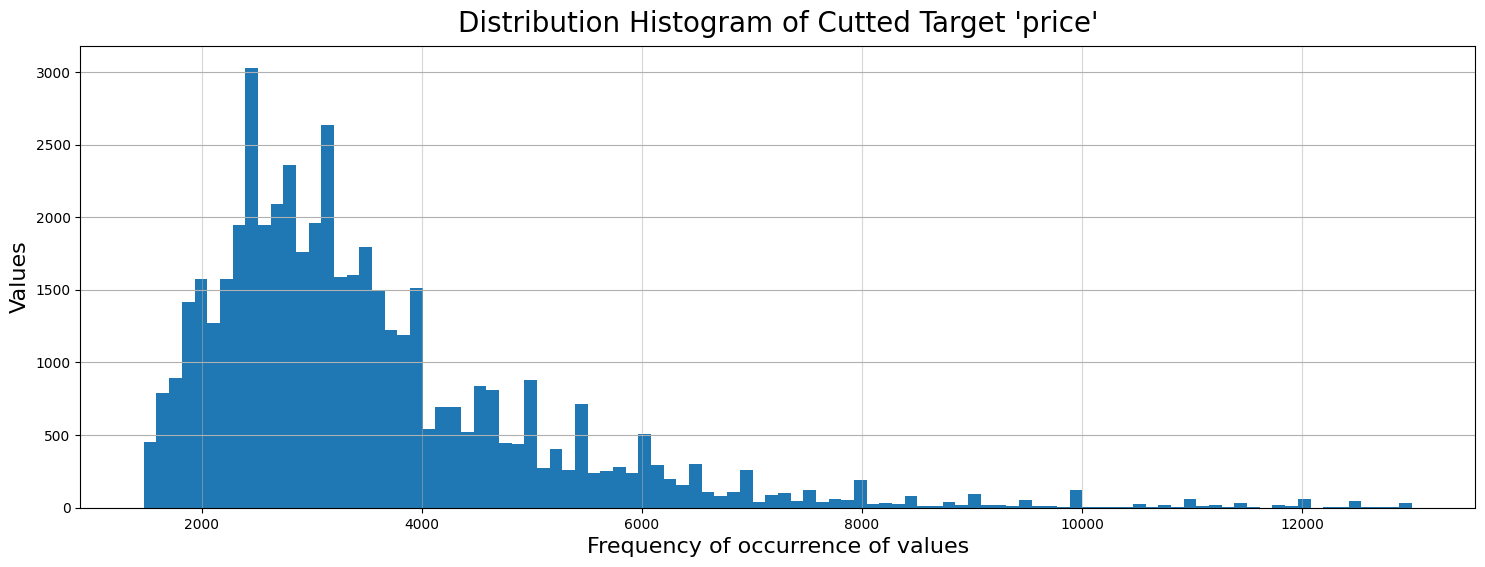

In [21]:
plt.figure(figsize=(18, 6, ), )
cut_df["price"].hist(bins=100, )
plt.grid(axis='x', alpha=0.5, )
plt.ylabel("Values", fontsize=16, )
plt.xlabel("Frequency of occurrence of values", fontsize=16, )
plt.title(
    "Distribution Histogram of Cutted Target 'price'",
    pad=10,
    fontsize=20,
)
plt.show();

### Explain the result:

We dropped the outliers, which allowed us to shrink the figure into a range.
However, it can be seen that the right `tail` of the distribution is longer than the left.

## Features analysis:

### `What is the type of column interest_level?`

In [22]:
print(
    f"The type of `interest_level` is: {
        type(cut_df["interest_level"].iloc[0], )
    }.",
)

The type of `interest_level` is: <class 'str'>.


### Print the values of column `interest_level`:

In [23]:
cut_df["interest_level"]

4         medium
6            low
9         medium
10        medium
15           low
           ...  
124000       low
124002    medium
124004    medium
124008    medium
124009      high
Name: interest_level, Length: 48379, dtype: object

### `How many items each value contains?`

In [24]:
cut_df["interest_level"].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

Decode these values:

In [25]:
cut_df.loc[:, "interest_level"] = cut_df["interest_level"].astype(
    "category",
).cat.codes

Check `cut_df` *Pandas* dataframe:

In [26]:
cut_df

,price,bedrooms,bathrooms,interest_level
4,2400,1,1.0,2
6,3800,2,1.0,1
9,3495,2,1.0,2
10,3000,3,1.5,2
15,2795,0,1.0,1
...,...,...,...,...
124000,2800,3,1.0,1
124002,2395,2,1.0,2
124004,1850,1,1.0,2
124008,4195,2,1.0,2


### Plot histograms for features: `bathrooms`,  `bedrooms`:

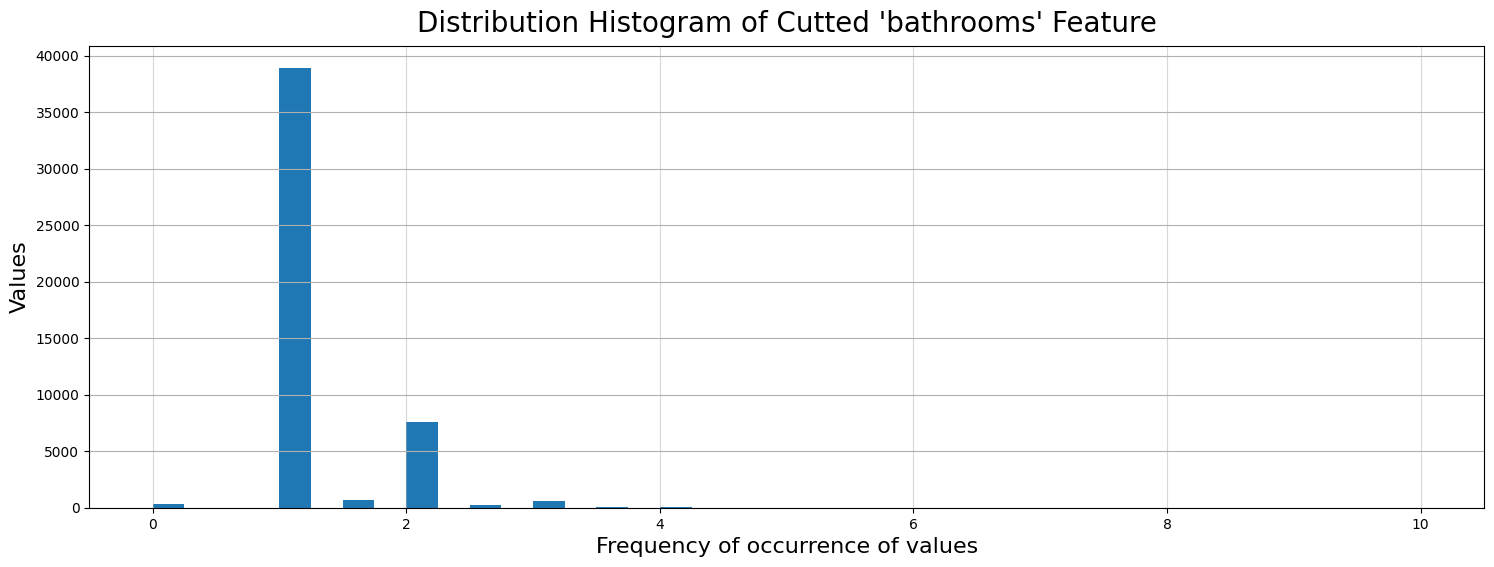

In [27]:
plt.figure(figsize=(18, 6, ), )
cut_df["bathrooms"].hist(bins=40, )
plt.grid(axis='x', alpha=0.5, )
plt.ylabel("Values", fontsize=16, )
plt.xlabel("Frequency of occurrence of values", fontsize=16, )
plt.title(
    "Distribution Histogram of Cutted 'bathrooms' Feature",
    pad=10,
    fontsize=20,
)
plt.show();

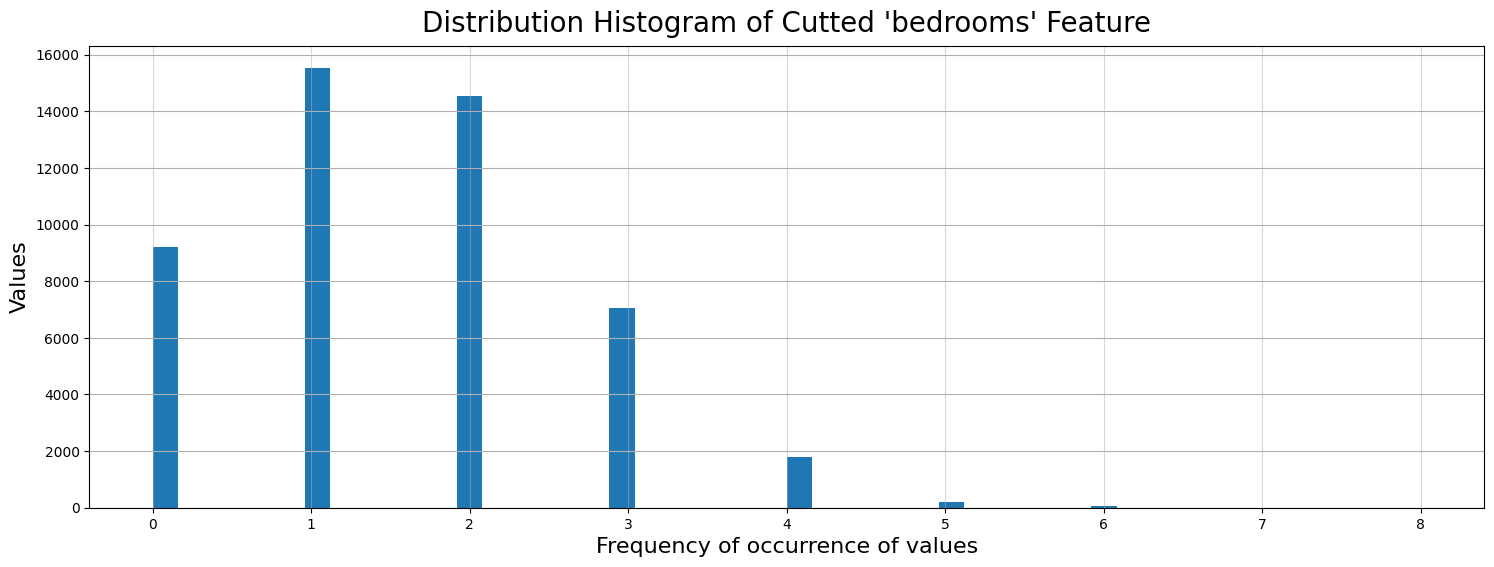

In [28]:
plt.figure(figsize=(18, 6, ), )
cut_df["bedrooms"].hist(bins=50, )
plt.grid(axis='x', alpha=0.5, )
plt.ylabel("Values", fontsize=16, )
plt.xlabel("Frequency of occurrence of values", fontsize=16, )
plt.title(
    "Distribution Histogram of Cutted 'bedrooms' Feature",
    pad=10,
    fontsize=20,
)
plt.show();

### `Are there outliers?`

Answer: it's hard to say, since this graph does not explicitly show the presence of emissions.
However, judging by the complexity of the graph compressibility, there may be outliers.

## Complex analysis:

### Plot a correlation matrix to understand correlation:

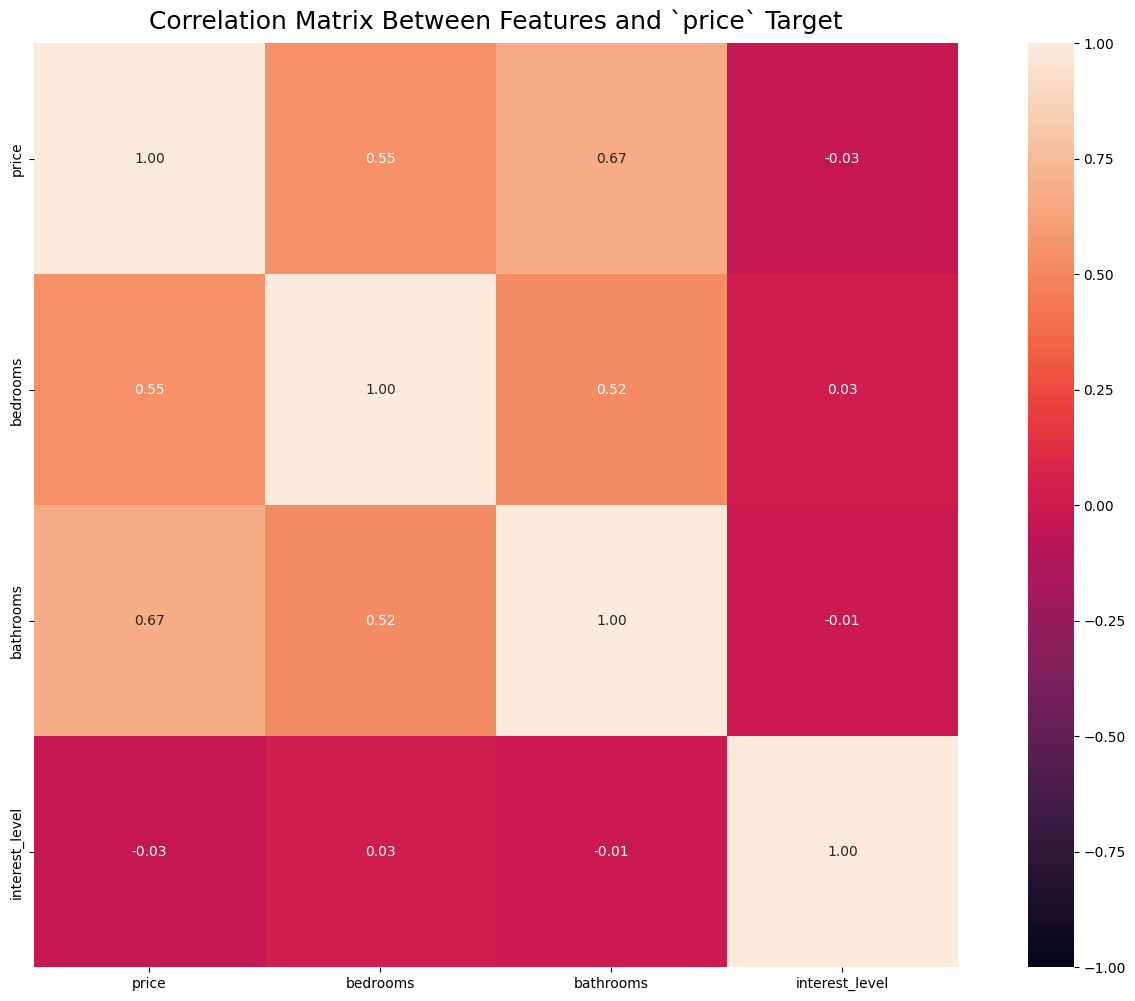

In [29]:
plt.figure(figsize=(18, 12, ), )
sns.heatmap(
    cut_df.corr(),
    vmax=1,
    vmin=-1,
    fmt=".2f",
    annot=True,
    square=True,
)
plt.title(
    "Correlation Matrix Between Features and `price` Target",
    pad=10,
    fontsize=18,
)
plt.yticks(rotation=90, )
plt.show();

### `Is there a correlation?`

Answer: yes, there are strong correlations, except for the `interest_level` attribute.

### Use a *scatter* plot to visualize correlation between features and target:

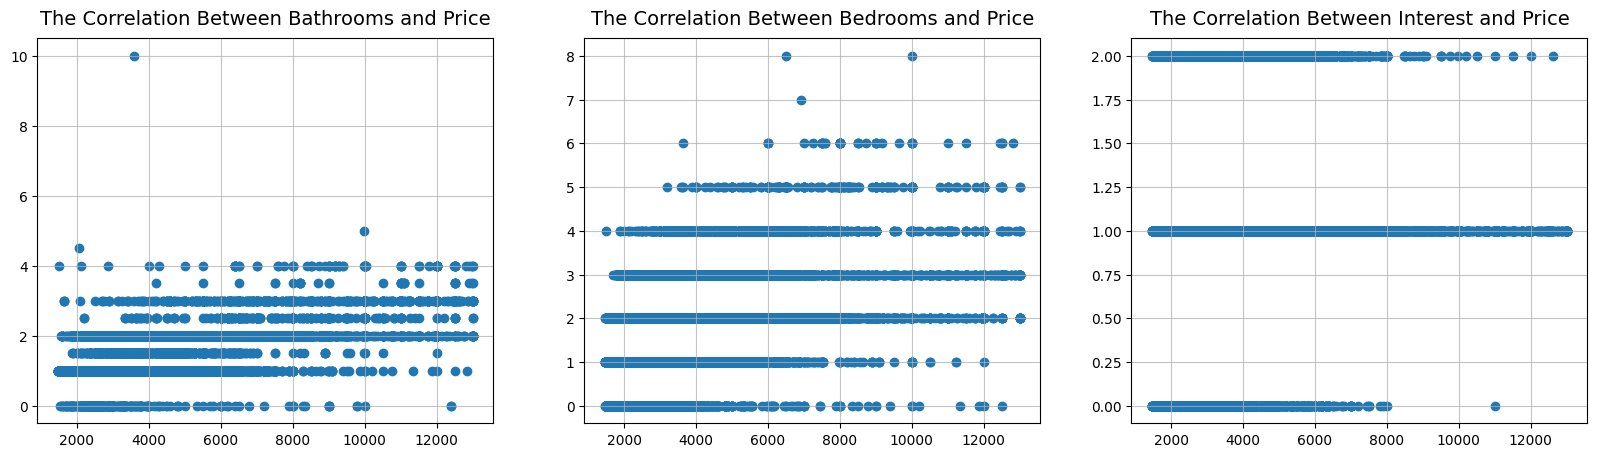

In [30]:
plt.figure(figsize=(20, 5, ), )

plt.subplot(1, 3, 1, )
plt.grid(alpha=0.75, )
plt.scatter(
    cut_df["price"],
    cut_df["bathrooms"],
)
plt.title(
    "The Correlation Between Bathrooms and Price",
    pad=10,
    fontsize=14,
)

plt.subplot(1, 3, 2, )
plt.grid(alpha=0.75, )
plt.scatter(
    cut_df["price"],
    cut_df["bedrooms"],
)
plt.title(
    "The Correlation Between Bedrooms and Price",
    pad=10,
    fontsize=14,
)

plt.subplot(1, 3, 3, )
plt.grid(alpha=0.75, )
plt.scatter(
    cut_df["price"],
    cut_df["interest_level"],
)
plt.title(
    "The Correlation Between Interest and Price",
    pad=10,
    fontsize=14,
)
plt.show();

## Generate features:

### Add `3` features, which are squared: `bathrooms_squared`, `bedrooms_squared`, `interest_level_squared`:

In [31]:
cut_df.loc[:, "bedrooms_squared"] = cut_df["bedrooms"] ** 2
cut_df.loc[:, "bathrooms_squared"] = cut_df["bathrooms"] ** 2
cut_df.loc[:, "interest_level_squared"] = cut_df["interest_level"] ** 2

Check `cut_df` *Pandas* dataframe:

In [32]:
cut_df

,price,bedrooms,bathrooms,interest_level,bedrooms_squared,bathrooms_squared,interest_level_squared
4,2400,1,1.0,2,1,1.00,4
6,3800,2,1.0,1,4,1.00,1
9,3495,2,1.0,2,4,1.00,4
10,3000,3,1.5,2,9,2.25,4
15,2795,0,1.0,1,0,1.00,1
...,...,...,...,...,...,...,...
124000,2800,3,1.0,1,9,1.00,1
124002,2395,2,1.0,2,4,1.00,4
124004,1850,1,1.0,2,1,1.00,4
124008,4195,2,1.0,2,4,1.00,4


### Plot a correlation matrix with features:

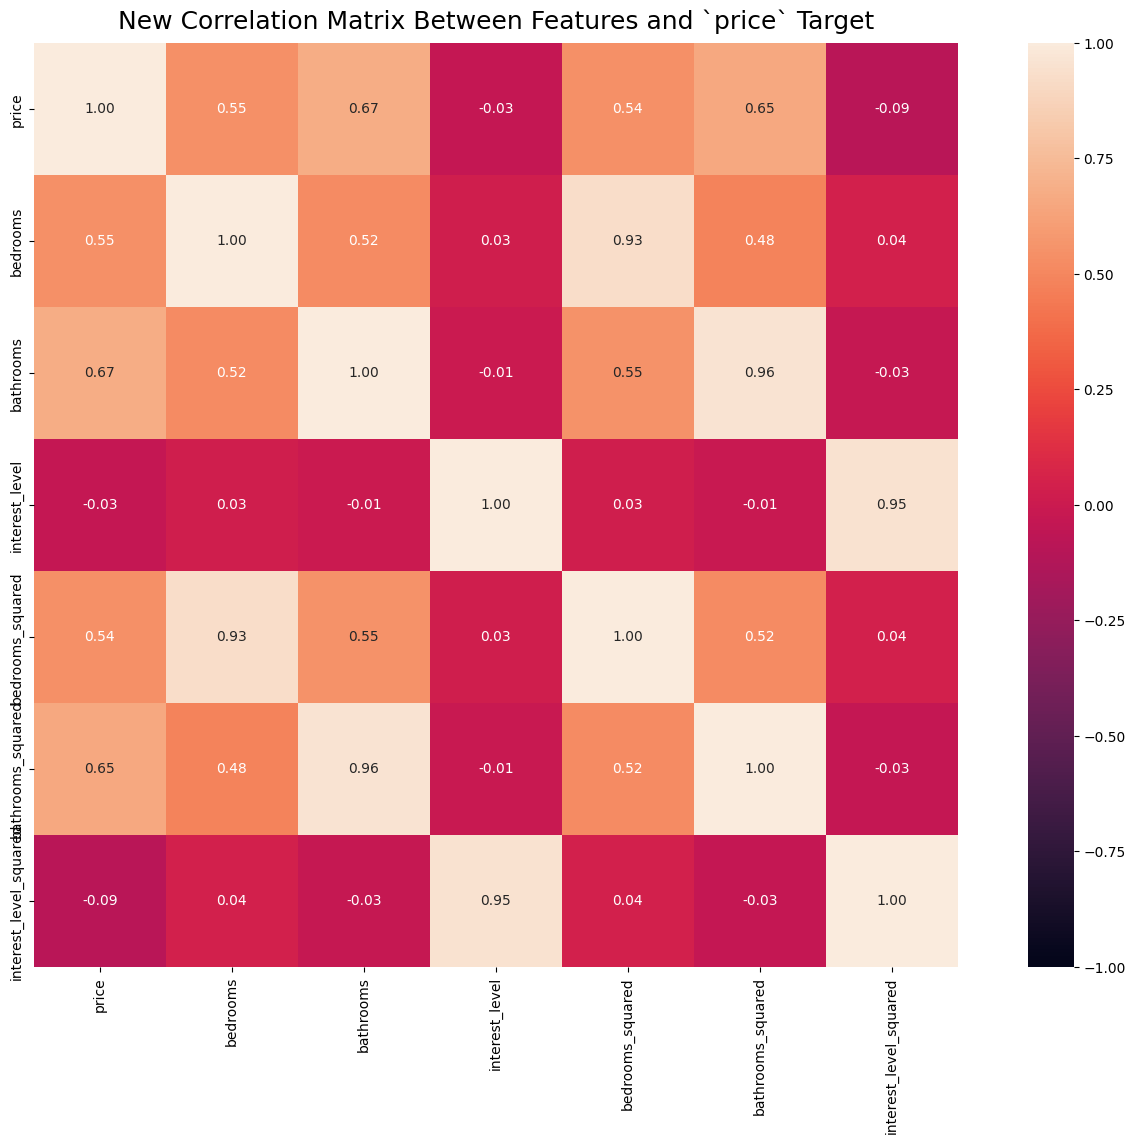

In [33]:
plt.figure(figsize=(18, 12, ), )
sns.heatmap(
    cut_df.corr(),
    vmax=1,
    vmin=-1,
    fmt=".2f",
    annot=True,
    square=True,
)
plt.title(
    "New Correlation Matrix Between Features and `price` Target",
    pad=10,
    fontsize=18,
)
plt.yticks(rotation=90, )
plt.show();

### `Are new features more correlated with target then basic features?`

Answer: no, only `interest_level_squared` feature correlate more then it's base feature.

### To train the model, we will consider: `bathrooms`, `bedrooms` features:

In [34]:
y: Series = cut_df["price"]
X: DataFrame = cut_df[["bathrooms", "bedrooms", ]]

Check `X` *Pandas* dataframe:

In [35]:
X

,bathrooms,bedrooms
4,1.0,1
6,1.0,2
9,1.0,2
10,1.5,3
15,1.0,0
...,...,...
124000,1.0,3
124002,1.0,2
124004,1.0,1
124008,1.0,2


Check `y` *Pandas* series:

In [36]:
y

4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 48379, dtype: int64

### Split data to *train* and *test* samples:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=21,
)

Check `X_train`, `X_test`, `y_train`, `y_test` *Pandas* structures:

In [38]:
X_train

,bathrooms,bedrooms
114912,1.0,1
7415,2.0,3
33694,1.0,0
111682,1.0,1
27658,2.0,2
...,...,...
42218,2.0,3
23111,1.0,2
15351,2.0,3
13731,1.0,1


In [39]:
X_test

,bathrooms,bedrooms
3230,1.0,2
94946,1.0,0
75895,1.0,0
33174,1.0,1
123977,1.0,1
...,...,...
106147,1.0,1
13202,1.0,1
120652,1.0,1
118699,2.0,3


In [40]:
y_train

114912    4995
7415      7850
33694     2465
111682    2400
27658     6200
          ... 
42218     4495
23111     3200
15351     4900
13731     2150
39242     2495
Name: price, Length: 38703, dtype: int64

In [41]:
y_test

3230      2850
94946     2400
75895     2550
33174     2400
123977    3795
          ... 
106147    1550
13202     6231
120652    2200
118699    4300
101334    4700
Name: price, Length: 9676, dtype: int64

### Initialize `PolynomialFeatures()` with the degree of `10`:

In [42]:
poly_features_model: PolynomialFeatures = PolynomialFeatures(10, )

### Apply `poly_features_model` to fit and transform train and test data:

In [43]:
X_train_poly: DataFrame = poly_features_model.fit_transform(X_train, )

In [44]:
X_test_poly: DataFrame = poly_features_model.fit_transform(X_test, )

Check `X_train_poly` and `X_test_poly` *Pandas* dataframe:

In [45]:
X_train_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.6244e+04, 3.9366e+04,
        5.9049e+04],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.6244e+04, 3.9366e+04,
        5.9049e+04],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00]], shape=(38703, 66))

In [46]:
X_test_poly

array([[1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 2.6244e+04, 3.9366e+04,
        5.9049e+04],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03]], shape=(9676, 66))

## Train `3` models:

### Create two *Pandas* dataframe's with columns: `model`, `train`, `test`:

In [47]:
result_MAE: DataFrame = DataFrame(
    {
        "test": [],
        "model": [],
        "train": [],
    },
)
result_RMSE: DataFrame = DataFrame(
    {
        "test": [],
        "model": [],
        "train": [],
    },
)

### Initialize *Linear Regression* without parameters:

In [48]:
lin_reg_model: LinearRegression = LinearRegression()

### Fit `lin_reg_model` and make predict on train and test data:

In [49]:
lin_reg_model.fit(X_train_poly, y_train, );

Get `lin_reg_model` predictions:

In [50]:
lin_reg_preds: array = lin_reg_model.predict(X_test_poly, );

Check `lin_reg_preds` *NumPy* array:

In [51]:
lin_reg_preds

array([3200.01941594, 2474.85488452, 2474.85488452, ..., 3038.30505582,
       5227.47643279, 3200.01941594], shape=(9676,))

### Calculate *MAE* (Mean Absolute Error) on train and test targets:

In [52]:
lin_reg_model_train_mae: float = mean_absolute_error(
    y_train,
    lin_reg_model.predict(X_train_poly, ),
)
lin_reg_model_test_mae: float = mean_absolute_error(
    y_test,
    lin_reg_model.predict(X_test_poly, ),
)

### Calculate *RMSE* (Root Mean Square Error) on train and test targets:

In [53]:
lin_reg_model_train_rmse: float = mean_squared_error(
    y_train,
    lin_reg_model.predict(X_train_poly, ),
) ** 0.5
lin_reg_model_test_rmse: float = mean_squared_error(
    y_test,
    lin_reg_model.predict(X_test_poly, ),
) ** 0.5

### Insert metrics into tables *result_MAE* and *result_RMSE* with model name `linear_regression`:

In [54]:
result_MAE.loc[len(result_MAE, )] = [
    lin_reg_model_test_mae,
    "linear_regression",
    lin_reg_model_train_mae,
]

In [55]:
result_RMSE.loc[len(result_RMSE, )] = [
    lin_reg_model_test_rmse,
    "linear_regression",
    lin_reg_model_train_rmse,
]

Check `result_MAE` and `result_RMSE` *Pandas* dataframes:

In [56]:
result_MAE

,test,model,train
0,759.829898,linear_regression,756.726508


In [57]:
result_RMSE

,test,model,train
0,1247.298979,linear_regression,1079.066347


### Initialize *decision tree* regressor from *sklearn* with `random_state=42`:

In [58]:
tree_model: DecisionTreeRegressor = DecisionTreeRegressor(random_state=42, )

### Fit it on train features and train target and make predict on train and test features:

In [59]:
tree_model.fit(X_train_poly, y_train, );

Get `tree_model` predictions:

In [60]:
tree_preds: array = tree_model.predict(X_test_poly, );

Check `tree_preds` *NumPy* array:

In [61]:
tree_preds

array([3200.33558198, 2474.74774775, 2474.74774775, ..., 3038.09639252,
       5232.66202873, 3200.33558198], shape=(9676,))

### Calculate *MAE* (Mean Absolute Error) on train and test targets:

In [62]:
tree_model_train_mae: float = mean_absolute_error(
    y_train,
    tree_model.predict(X_train_poly, ),
)
tree_model_test_mae: float = mean_absolute_error(
    y_test,
    tree_model.predict(X_test_poly, ),
)

### Calculate *RMSE* (Root Mean Square Error) on train and test targets:

In [63]:
tree_model_train_rmse: float = mean_squared_error(
    y_train,
    tree_model.predict(X_train_poly, ),
) ** 0.5
tree_model_test_rmse: float = mean_squared_error(
    y_test,
    tree_model.predict(X_test_poly, ),
) ** 0.5

### Insert metrics into tables *result_MAE* and *result_RMSE* with model name `decision_tree`:

In [64]:
result_MAE.loc[len(result_MAE, )] = [
    tree_model_test_mae,
    "decision_tree",
    tree_model_train_mae,
]

In [65]:
result_RMSE.loc[len(result_RMSE, )] = [
    tree_model_test_rmse,
    "decision_tree",
    tree_model_train_rmse,
]

Check `result_MAE` and `result_RMSE` *Pandas* dataframes:

In [66]:
result_MAE

,test,model,train
0,759.829898,linear_regression,756.726508
1,753.951417,decision_tree,756.704419


In [67]:
result_RMSE

,test,model,train
0,1247.298979,linear_regression,1079.066347
1,1073.751315,decision_tree,1078.967775


## Native models:

Calculate mean and median of `price` on train and test data and create a columns with these values:

In [68]:
mean_train_price: float = y_train.mean()
median_train_price: float = y_train.median()
mean_test_price: float = y_test.mean()
median_test_price: float = y_test.median()

### Calculate *MAE* on train and test targets between target and calculated mean and median values:

In [69]:
mean_train_mae: float = mean_absolute_error(
    full(len(y_train, ), mean_train_price, ),
    y_train,
)
mean_test_mae: float = mean_absolute_error(
    full(len(y_test, ), mean_test_price, ),
    y_test,
)
median_train_mae: float = mean_absolute_error(
    full(len(y_train, ), median_train_price, ),
    y_train,
)
median_test_mae: float = mean_absolute_error(
    full(len(y_test, ), median_test_price, ),
    y_test,
)

### Calculate *RMSE* on train and test targets between target and calculated mean and median values:

In [70]:
mean_train_rmse: float = mean_squared_error(
    full(len(y_train, ), mean_train_price, ),
    y_train,
) ** 0.5
mean_test_rmse: float = mean_squared_error(
    full(len(y_test, ), mean_test_price, ),
    y_test,
) ** 0.5
median_train_rmse: float = mean_squared_error(
    full(len(y_train, ), median_train_price, ),
    y_train,
) ** 0.5
median_test_rmse: float = mean_squared_error(
    full(len(y_test, ), median_test_price, ),
    y_test,
) ** 0.5

### Insert metrics into tables `result_MAE` and `result_RMSE` with model names `native_mean` and `native_median`:

In [71]:
result_MAE.loc[len(result_MAE, )] = [
    mean_test_mae,
    "native_mean",
    mean_train_mae,
]
result_MAE.loc[len(result_MAE, )] = [
    median_test_mae,
    "native_median",
    median_train_mae,
]

In [72]:
result_RMSE.loc[len(result_RMSE, )] = [
    mean_test_rmse,
    "native_mean",
    mean_train_rmse,
]
result_RMSE.loc[len(result_RMSE, )] = [
    median_test_rmse,
    "native_median",
    median_train_rmse,
]

Check `result_MAE` and `result_RMSE` *Pandas* dataframes:

In [73]:
result_MAE

,test,model,train
0,759.829898,linear_regression,756.726508
1,753.951417,decision_tree,756.704419
2,1134.133499,native_mean,1140.445303
3,1081.216618,native_median,1087.459008


In [74]:
result_RMSE

,test,model,train
0,1247.298979,linear_regression,1079.066347
1,1073.751315,decision_tree,1078.967775
2,1594.366370,native_mean,1598.460491
3,1639.336503,native_median,1645.459174


## Compare results:

### Print final tables `result_MAE` and `result_RMSE`:

In [75]:
result_MAE

,test,model,train
0,759.829898,linear_regression,756.726508
1,753.951417,decision_tree,756.704419
2,1134.133499,native_mean,1140.445303
3,1081.216618,native_median,1087.459008


In [76]:
result_RMSE

,test,model,train
0,1247.298979,linear_regression,1079.066347
1,1073.751315,decision_tree,1078.967775
2,1594.366370,native_mean,1598.460491
3,1639.336503,native_median,1645.459174


### `What is the best model?`

Answer: the best model is `decision tree`.

## Additional:

Initialize *XGBRegression*:

In [77]:
xgb_model: XGBRegressor = XGBRegressor(n_estimators=500, )

Fit `xgb_model` and make predict on train and test data:

In [78]:
xgb_model.fit(X_train_poly, y_train, );

Get `xgb_model` predictions:

In [79]:
xgb_preds: array = xgb_model.predict(X_test_poly, );

Check `xgb_preds` *NumPy* array:

In [80]:
xgb_preds

array([3200.3357, 2474.748 , 2474.748 , ..., 3038.0962, 5232.6626,
       3200.3357], shape=(9676,), dtype=float32)

Calculate *MAE* (Mean Absolute Error) on train and test targets:

In [81]:
xgb_model_train_mae: float = mean_absolute_error(
    y_train,
    xgb_model.predict(X_train_poly, ),
)
xgb_model_test_mae: float = mean_absolute_error(
    y_test,
    xgb_model.predict(X_test_poly, ),
)

Calculate *RMSE* (Root Mean Square Error) on train and test targets:

In [82]:
xgb_model_train_rmse: float = mean_squared_error(
    y_train,
    xgb_model.predict(X_train_poly, ),
) ** 0.5
xgb_model_test_rmse: float = mean_squared_error(
    y_test,
    xgb_model.predict(X_test_poly, ),
) ** 0.5

Insert metrics into tables *result_MAE* and *result_RMSE* with model name `xgb`:

In [83]:
result_MAE.loc[len(result_MAE, )] = [
    xgb_model_test_mae,
    "xgb",
    xgb_model_train_mae,
]

In [84]:
result_RMSE.loc[len(result_RMSE, )] = [
    xgb_model_test_rmse,
    "xgb",
    xgb_model_train_rmse,
]

Check `result_MAE` and `result_RMSE` *Pandas* dataframes:

In [85]:
result_MAE

,test,model,train
0,759.829898,linear_regression,756.726508
1,753.951417,decision_tree,756.704419
2,1134.133499,native_mean,1140.445303
3,1081.216618,native_median,1087.459008
4,754.086182,xgb,756.704468


In [86]:
result_RMSE

,test,model,train
0,1247.298979,linear_regression,1079.066347
1,1073.751315,decision_tree,1078.967775
2,1594.366370,native_mean,1598.460491
3,1639.336503,native_median,1645.459174
4,1074.200691,xgb,1078.967736
